# AlBert for Nepali (NepCov19Tweets) Sentiment Analysis.
**Sentiment Analysis on NepCov19Tweets Dataset, a collection of tweets in Nepali (Devnagari Script) regarding/during pandemic period.**

In [1]:
!pip install transformers datasets huggingface-hub --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import random
import os
import tensorflow as tf
from transformers import set_seed

rand_seed = 99

def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    set_seed(seed)
    
seed_everything(rand_seed)

## Model Selection and Preparation

### Loading Model
**and model hyper-parameter tuning**

In [3]:
from transformers import TFAutoModelForSequenceClassification, AlbertConfig

if False: ### Using Pre-trained (English) albert-base-v2
  model = TFAutoModelForSequenceClassification.from_pretrained('albert-base-v2',
              id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
              label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})
elif True:  ### Using Pre-trained (Nepali) raygx/Albert-Bhai-Nepali
  model = TFAutoModelForSequenceClassification.from_pretrained('raygx/Albert-Bhai-Nepali',
              id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
              label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})
else: ### Randomnly Initializing Model;
  model = TFAutoModelForSequenceClassification.from_config(config=AlbertConfig('albert-base-v2',
            id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
            label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2}))

All model checkpoint layers were used when initializing TFAlbertForSequenceClassification.

Some layers of TFAlbertForSequenceClassification were not initialized from the model checkpoint at raygx/Albert-Bhai-Nepali and are newly initialized: ['classifier', 'albert/pooler/kernel:0', 'albert/pooler/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
from transformers import AlbertTokenizerFast

tokenizer = AlbertTokenizerFast.from_pretrained('raygx/Albert-Bhai-Nepali')
model.resize_token_embeddings(len(tokenizer))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'PreTrainedTokenizerFast'. 
The class this function is called from is 'AlbertTokenizerFast'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<tf.Variable 'tf_albert_for_sequence_classification/albert/embeddings/word_embeddings/weight:0' shape=(30001, 128) dtype=float32, numpy=
array([[-0.00257458, -0.01249851, -0.03357233, ..., -0.0150874 ,
         0.00208345, -0.02378185],
       [ 0.036135  ,  0.02758075, -0.00577225, ...,  0.00421843,
        -0.02217576,  0.01035095],
       [ 0.03458647,  0.03707005,  0.02734535, ...,  0.03211867,
        -0.02426202,  0.01222699],
       ...,
       [ 0.00121513,  0.01902641, -0.01492319, ...,  0.0053486 ,
        -0.04247945,  0.01594521],
       [ 0.02390956,  0.03034714,  0.01985654, ...,  0.0265486 ,
         0.0006229 ,  0.0047668 ],
       [ 0.03127494,  0.00771207,  0.0239792 , ...,  0.0354004 ,
        -0.0376986 ,  0.05406245]], dtype=float32)>

In [5]:
print(model.summary())
model.config

Model: "tf_albert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 albert (TFAlbertMainLayer)  multiple                  11683712  
                                                                 
 dropout_4 (Dropout)         multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 11,686,019
Trainable params: 11,686,019
Non-trainable params: 0
_________________________________________________________________
None


AlbertConfig {
  "_name_or_path": "raygx/Albert-Bhai-Nepali",
  "architectures": [
    "AlbertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 2,
  "classifier_dropout": null,
  "classifier_dropout_prob": 0.1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "albert",
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30001
}

### Optimizer Selection and Hyperparameter Tuning

In [6]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=5e-6, weight_decay_rate=0.001)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


# Dataset Selection and Prepartion

**Loading Dataset**

In [7]:
import datasets

data = datasets.load_dataset("raygx/NepCov19TweetsPlus")
data = data.shuffle(rand_seed)
data = data['train'].train_test_split(test_size=0.2)
data = data.rename_columns({"Sentences":"text","Sentiment":"labels"})
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/41550 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/raygx___parquet/raygx--NepCov19TweetsPlus-ce0effd6da77cd1f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33240
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 8310
    })
})

### Label Encoding

In [8]:
%%time
def LabelEncoding(x):
    if x['labels']==0:
        x['labels'] = 0#[1,0,0]
    if x['labels']==1:
        x['labels'] =  1#[0,1,0]
    if x['labels']==-1:
        x['labels'] =  2#[0,0,1]
    
    return x

data = data.map(
        LabelEncoding,
        num_proc=4)

data

Map (num_proc=4):   0%|          | 0/33240 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/8310 [00:00<?, ? examples/s]

CPU times: user 399 ms, sys: 360 ms, total: 759 ms
Wall time: 6.82 s


DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33240
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 8310
    })
})

### Tokenization

In [9]:
%%time

def preprocess_function(rows):
    return globals()['tokenizer'](rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=2,
    remove_columns=data["train"].column_names,
)
tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="labels",column=data['train']['labels']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="labels",column=data['test']['labels']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=2):   0%|          | 0/33240 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map (num_proc=2):   0%|          | 0/8310 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 571 ms, sys: 257 ms, total: 829 ms
Wall time: 13.1 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 33240
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 8310
    })
})

### Initializing the Data Collator

In [10]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [11]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


## Training and Evaluation

In [12]:
%%time

n_epoch = 4

print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)

Training the model
Epoch 1/4
2077/2077 [==============================] - 426s 193ms/step - loss: 0.8189 - val_loss: 0.7139
Epoch 2/4
2077/2077 [==============================] - 404s 194ms/step - loss: 0.6929 - val_loss: 0.7033
Epoch 3/4
2077/2077 [==============================] - 403s 194ms/step - loss: 0.6367 - val_loss: 0.6479
Epoch 4/4
2077/2077 [==============================] - 410s 198ms/step - loss: 0.5848 - val_loss: 0.6361
CPU times: user 22min 45s, sys: 1min 42s, total: 24min 27s
Wall time: 29min 20s


**Loss Graph Visualization**

<Axes: >

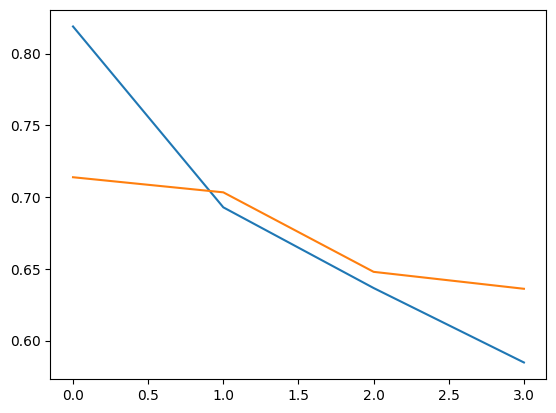

In [13]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

In [17]:
print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=2)

Training the model
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


2077/2077 [==============================] - 406s 195ms/step - loss: 0.5399 - val_loss: 0.6224
Epoch 2/2
2077/2077 [==============================] - 409s 197ms/step - loss: 0.4990 - val_loss: 0.6383


### Evaluation

In [18]:
%%time
from transformers import pipeline, TextClassificationPipeline

print("Getting Test Prediction")
pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
prediction = pipe(data['test']['text'])
pred_labels = [model.config.label2id[x['label']] for x in prediction]

actual_labels = data['test']['labels']

Getting Test Prediction
CPU times: user 31min 56s, sys: 7.93 s, total: 32min 4s
Wall time: 32min 10s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.73373115679982
Precision-Score 0.7439217354868944
Recall-Score 0.7348977135980747
accuracy_Score 0.7348977135980747


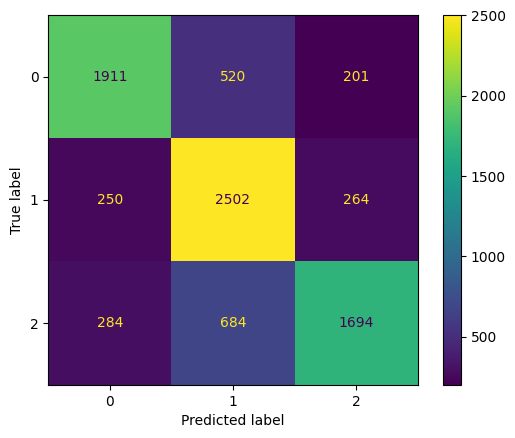

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()